# Import the Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
import csv

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

import tensorflow as tf

# Import and view the Data

In [ ]:
# Get the Stock
stock = yf.Ticker("NVDA")

# Get historical market data
data_hist = stock.history(start = "2014-01-01",end = "2024-01-01", actions=False, rounding=False)

data_hist.to_csv('stock_price_NVDA.csv')

data = pd.read_csv('stock_price_NVDA.csv', parse_dates=['Date'])

data.set_index('Date', inplace=True)

# View the data
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2014-01-02 00:00:00-05:00,3.754698,3.768849,3.707529,3.740547,26009200
2014-01-03 00:00:00-05:00,3.747622,3.754698,3.683943,3.695736,25933200
2014-01-06 00:00:00-05:00,3.733472,3.773566,3.698095,3.745264,40949200
2014-01-07 00:00:00-05:00,3.783000,3.820736,3.757057,3.806585,33328800
2014-01-08 00:00:00-05:00,3.820736,3.877339,3.806585,3.858472,30819200


In [ ]:
# Only closing price of data

stock_prices = pd.DataFrame(data['Close']).rename(columns={'Close':'Price'})
stock_prices.head()

,Price
Date,
2014-01-02 00:00:00-05:00,3.740547
2014-01-03 00:00:00-05:00,3.695736
2014-01-06 00:00:00-05:00,3.745264
2014-01-07 00:00:00-05:00,3.806585
2014-01-08 00:00:00-05:00,3.858472


In [ ]:
 # Convert index to list if you need to use it as a list
Time = data.index[:10].tolist()
stock_p = data['Close'][:10].tolist()

Time, stock_p

([Timestamp('2014-01-02 00:00:00-0500', tz='UTC-05:00'),
  Timestamp('2014-01-03 00:00:00-0500', tz='UTC-05:00'),
  Timestamp('2014-01-06 00:00:00-0500', tz='UTC-05:00'),
  Timestamp('2014-01-07 00:00:00-0500', tz='UTC-05:00'),
  Timestamp('2014-01-08 00:00:00-0500', tz='UTC-05:00'),
  Timestamp('2014-01-09 00:00:00-0500', tz='UTC-05:00'),
  Timestamp('2014-01-10 00:00:00-0500', tz='UTC-05:00'),
  Timestamp('2014-01-13 00:00:00-0500', tz='UTC-05:00'),
  Timestamp('2014-01-14 00:00:00-0500', tz='UTC-05:00'),
  Timestamp('2014-01-15 00:00:00-0500', tz='UTC-05:00')],
 [3.740547180175781,
  3.695735692977905,
  3.7452642917633057,
  3.80658483505249,
  3.858471632003784,
  3.714603900909424,
  3.7098875045776367,
  3.622622966766357,
  3.735830545425415,
  3.775924205780029])

# Exploratory Data Analysis (EDA)

In [ ]:
data.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2516 entries, 2014-01-02 00:00:00-05:00 to 2023-12-29 00:00:00-05:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2516 non-null   float64
 1   High    2516 non-null   float64
 2   Low     2516 non-null   float64
 3   Close   2516 non-null   float64
 4   Volume  2516 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 117.9+ KB


In [ ]:
data.describe()

,Open,High,Low,Close,Volume
count,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03
mean,100.337689,102.143094,98.463538,100.387268,4.582860e+07
std,117.962454,119.984031,115.777944,117.956988,2.564292e+07
min,3.639133,3.660359,3.613189,3.622623,4.564400e+06
25%,11.683253,11.767974,11.588091,11.678953,2.938990e+07
50%,51.949130,52.657747,50.849705,51.901316,4.027660e+07
75%,145.635886,148.407596,142.203173,145.392067,5.520290e+07
max,502.050924,505.411861,494.096823,504.022034,3.692928e+08


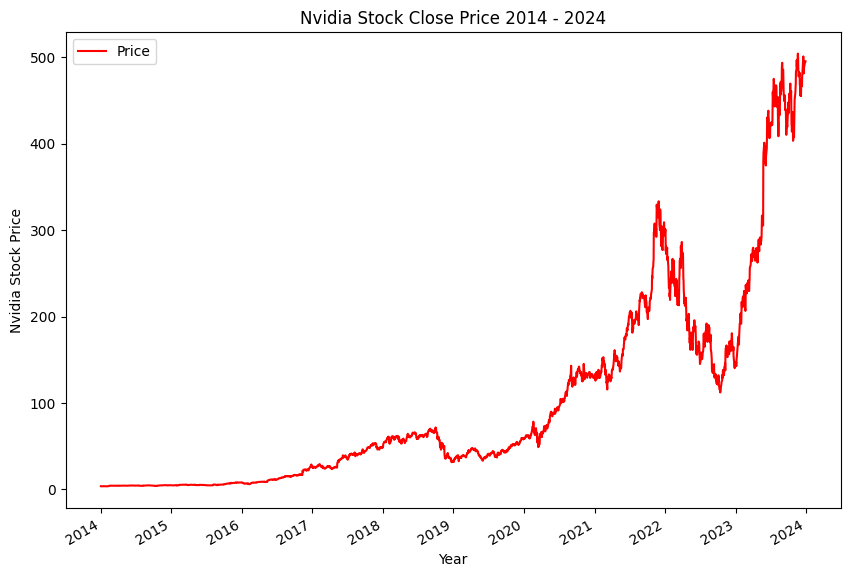

In [ ]:
stock_prices.plot(figsize=(10,7),color='red')
plt.ylabel('Nvidia Stock Price')
plt.xlabel('Year')
plt.title('Nvidia Stock Close Price 2014 - 2024')
plt.show()

Check for missing values and the datatype of the dataset

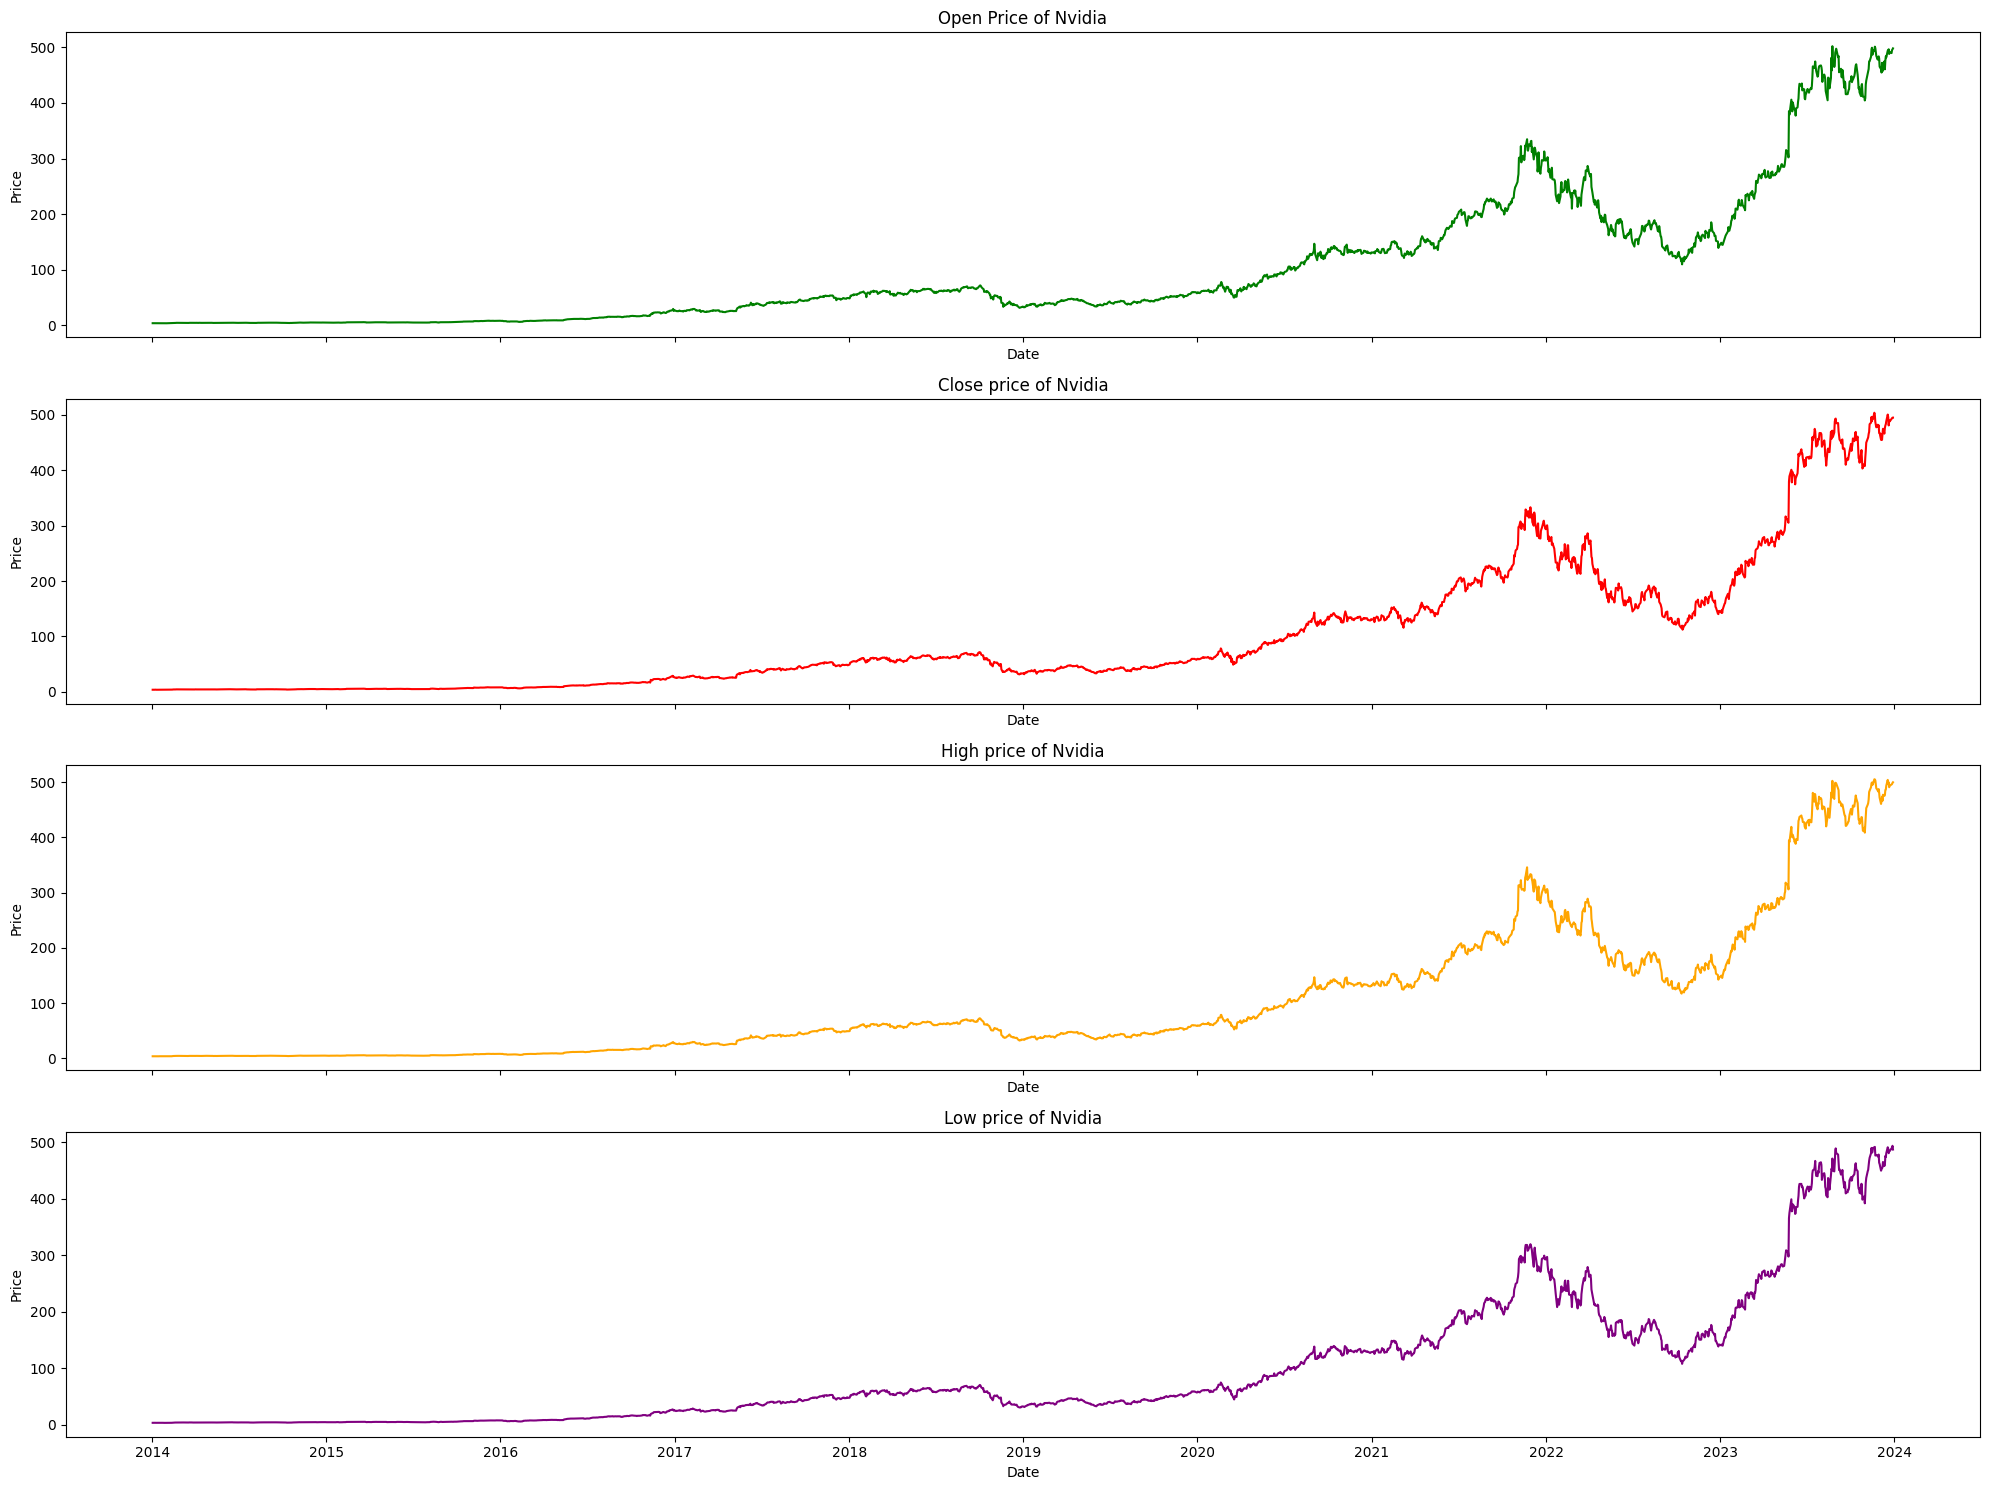

In [ ]:
# Create subplots
fig, ax = plt.subplots(4, 1, figsize=(20, 15), sharex=True)

# Plot each price series
ax[0].plot(data.index, data['Open'], color='green')
ax[1].plot(data.index, data['Close'], color='red')
ax[2].plot(data.index, data['High'], color='orange')
ax[3].plot(data.index, data['Low'], color='purple')

# Customize each subplot
ax[0].set_title('Open Price of NVDA')
ax[1].set_title('Close Price of NVDA')
ax[2].set_title('High Price of NVDA')
ax[3].set_title('Low Price of NVDA')

# Customize subplots
ax[0].set_title('Open Price of Nvidia')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Price')
ax[1].set_title('Close price of Nvidia')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Price')
ax[2].set_title('High price of Nvidia')
ax[2].set_xlabel('Date')
ax[2].set_ylabel('Price')
ax[3].set_title('Low price of Nvidia')
ax[3].set_xlabel('Date')
ax[3].set_ylabel('Price')

# Show the plot
plt.tight_layout()
plt.show()

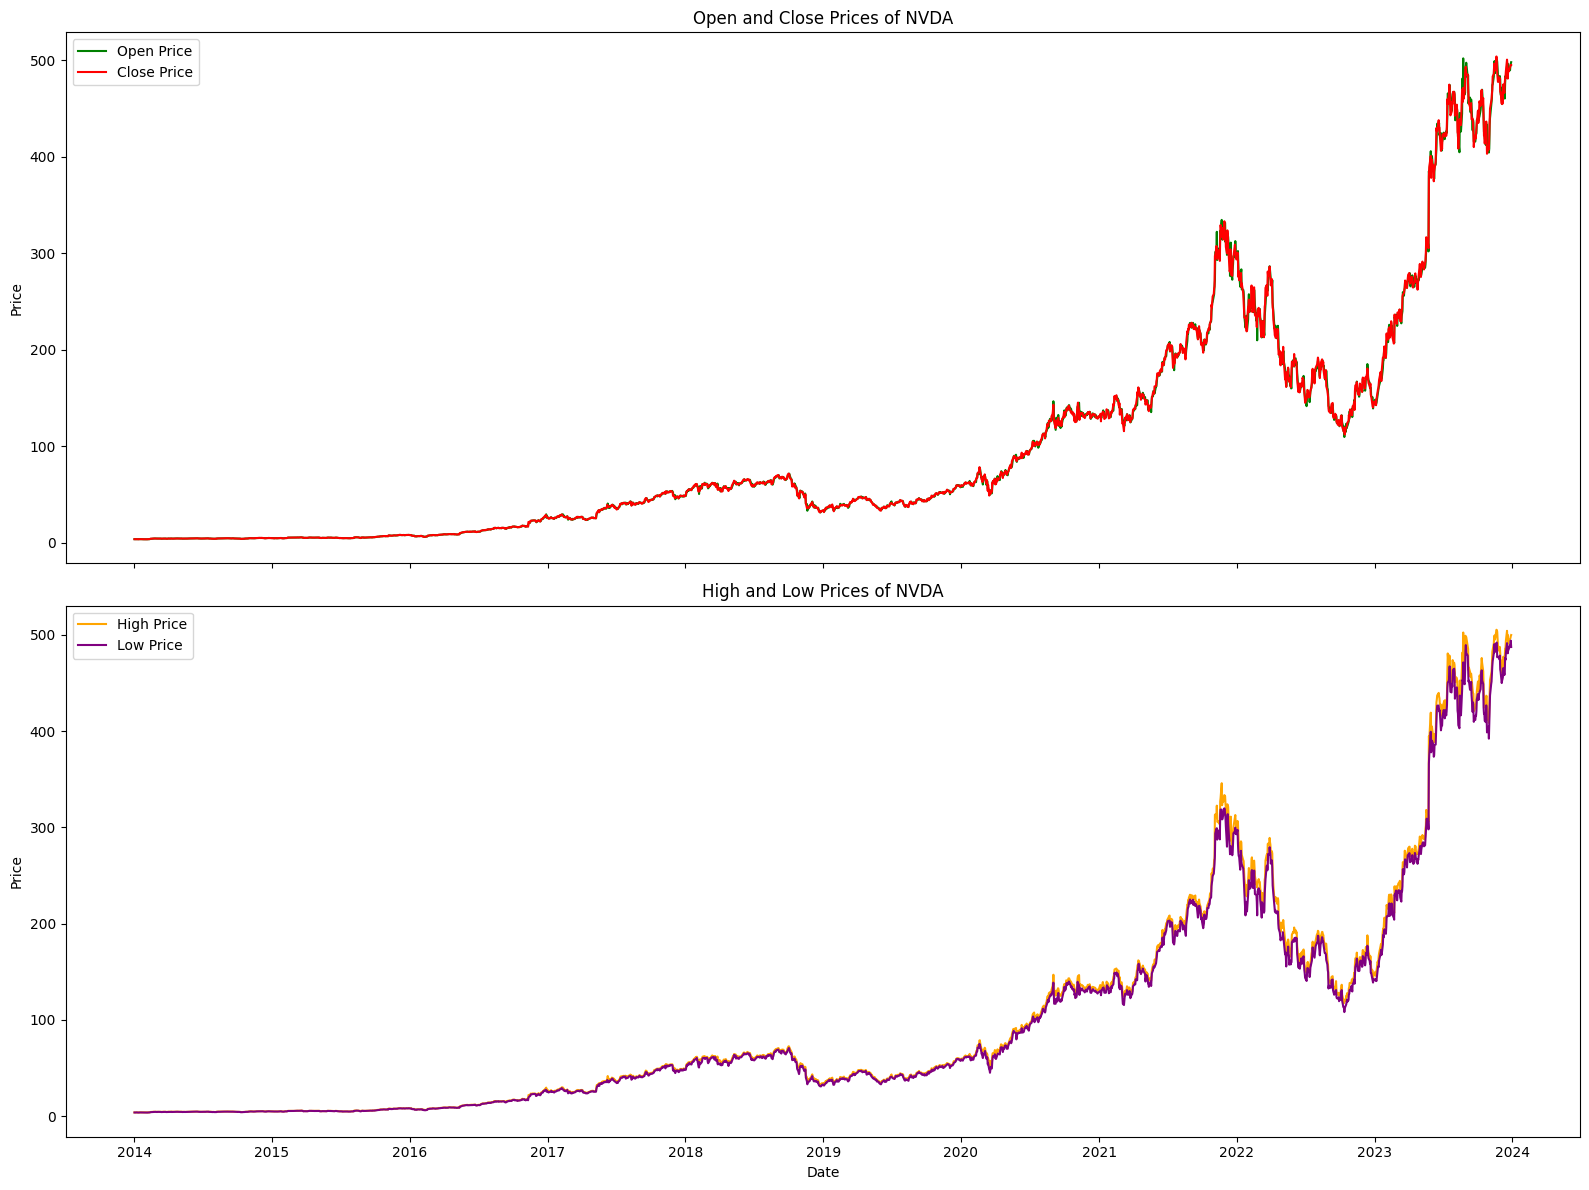

In [ ]:
# Create subplots for stock prices
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(16, 12))

# Plot each price series
ax[0].plot(data.index, data['Open'], color='green', label='Open Price')
ax[0].plot(data.index, data['Close'], color='red', label='Close Price')
ax[0].legend()
ax[1].plot(data.index, data['High'], color='orange', label='High Price')
ax[1].plot(data.index, data['Low'], color='purple', label='Low Price')
ax[1].legend()

# Customize subplots
ax[0].set_title('Open and Close Prices of NVDA')
ax[0].set_ylabel('Price')
ax[1].set_title('High and Low Prices of NVDA')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Price')

# Show the plot
plt.tight_layout()
plt.show()


# Data Preprocessing

In [ ]:
# Get Stock date array

timesteps = stock_prices.index.to_numpy()
prices = stock_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array([Timestamp('2014-01-02 00:00:00-0500', tz='UTC-05:00'),
        Timestamp('2014-01-03 00:00:00-0500', tz='UTC-05:00'),
        Timestamp('2014-01-06 00:00:00-0500', tz='UTC-05:00'),
        Timestamp('2014-01-07 00:00:00-0500', tz='UTC-05:00'),
        Timestamp('2014-01-08 00:00:00-0500', tz='UTC-05:00'),
        Timestamp('2014-01-09 00:00:00-0500', tz='UTC-05:00'),
        Timestamp('2014-01-10 00:00:00-0500', tz='UTC-05:00'),
        Timestamp('2014-01-13 00:00:00-0500', tz='UTC-05:00'),
        Timestamp('2014-01-14 00:00:00-0500', tz='UTC-05:00'),
        Timestamp('2014-01-15 00:00:00-0500', tz='UTC-05:00')],
       dtype=object),
 array([3.74054718, 3.69573569, 3.74526429, 3.80658484, 3.85847163,
        3.7146039 , 3.7098875 , 3.62262297, 3.73583055, 3.77592421]))

## Split Train and Test set

In [ ]:
split_size = int(0.8*len(prices)) #80% train , 20% test

# Create Train Data Splits

X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create Test Data Splits
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2012, 504, 2012, 504)

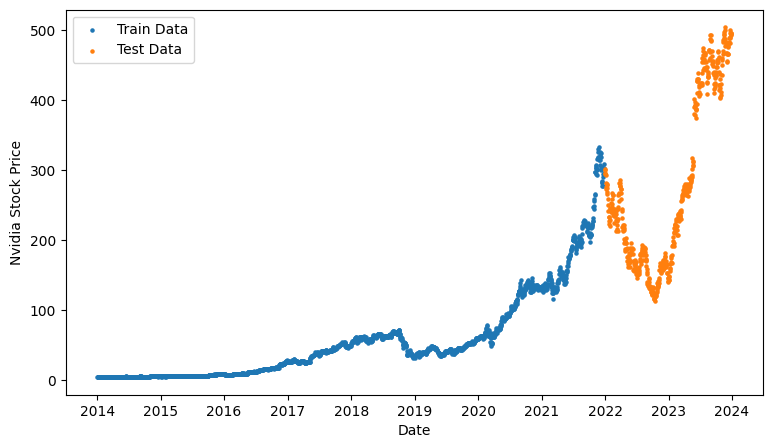

In [ ]:
# Plot and check the Split to check for data leakage

plt.figure(figsize=(9,5))

plt.scatter(X_train, y_train, s=5, label='Train Data')

plt.scatter(X_test, y_test, s=5, label='Test Data')

plt.xlabel("Date")

plt.ylabel('Nvidia Stock Price')

plt.legend(fontsize=10)

plt.show()

In [ ]:
# Visualize our train and test data.

def plot_time_series(timesteps, values,color, format=".", start=0, end= None, label=None):

  """
  plot Timesteps


  """

  plt.plot(timesteps[start:end], values[start:end],format, label=label,color=color)
  plt.xlabel('Year')
  plt.ylabel('Nvidia Stock Prices')
  if label:
    plt.legend(fontsize=10)

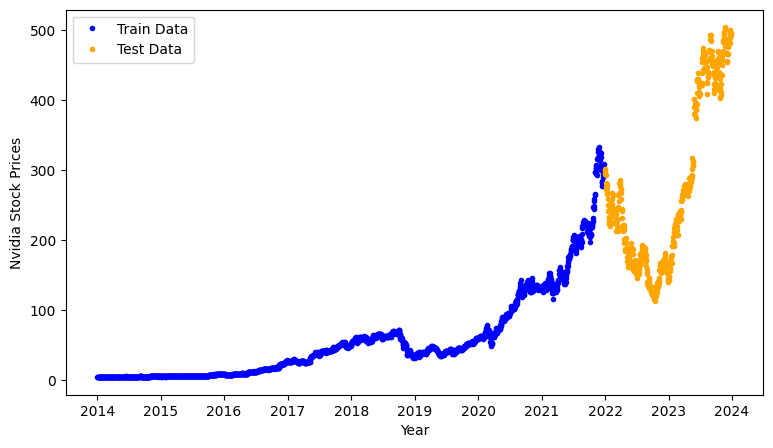

In [ ]:
plt.figure(figsize=(9,5))
plot_time_series(timesteps= X_train,values= y_train, label='Train Data', color='Blue')
plot_time_series(timesteps= X_test,values= y_test, label='Test Data', color='Orange')

# Feature Scaling

In [ ]:
# Create MinMaxScaler object
#scaler = MinMaxScaler()

# Reshape the data to 2D array since MinMaxScaler expects 2D input
#X_train_reshaped = X_train.reshape(-1, 1)
#X_test_reshaped = X_test.reshape(-1, 1)

# Fit the scaler on the training data and transform both training and test data
#X_train_scaled = scaler.fit_transform(X_train_reshaped)
#X_test_scaled = scaler.transform(X_test_reshaped)

# After scaling, you may need to reshape the data back to 1D array if needed
#X_train_scaled = X_train_scaled.flatten()
#X_test_scaled = X_test_scaled.flatten()

# Now X_train_scaled and X_test_scaled contain scaled values of timesteps


# Modelling Experimation

In [ ]:
# Baseline Model

naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([299.58279419, 295.43859863, 293.69113159, 300.78103638,
        292.4828186 , 275.6468811 , 281.37866211, 272.0819397 ,
        273.60977173, 277.77389526]),
 array([483.47732544, 488.8770752 , 500.74649048, 496.01675415,
        481.08740234, 489.87701416, 488.27706909, 492.76690674,
        494.14682007, 495.19677734]))

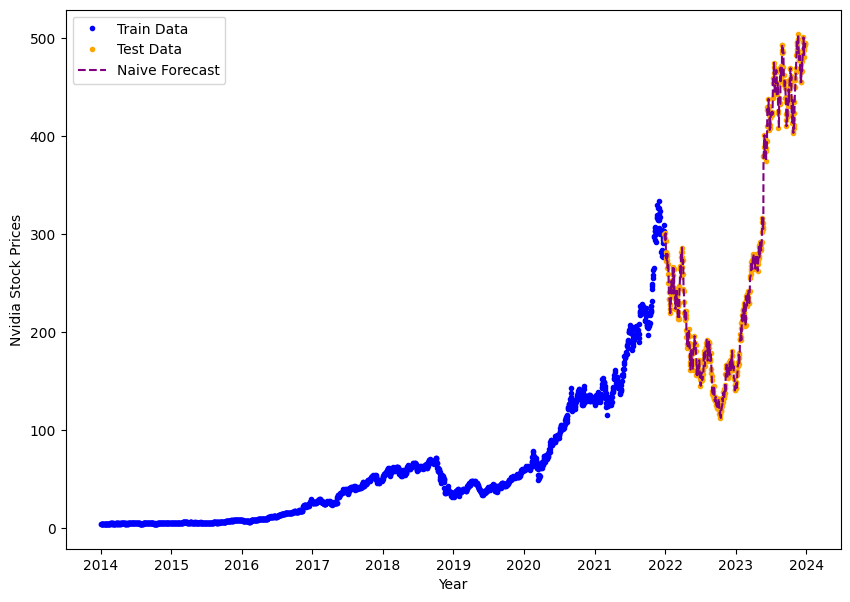

In [ ]:
# Plot Naive Forecast

plt.figure(figsize=(10,7))

plot_time_series(timesteps=X_train, values= y_train, label='Train Data', color='Blue')

plot_time_series(timesteps=X_test, values= y_test, label='Test Data',color='Orange')

plot_time_series(timesteps=X_test[1:], values= naive_forecast, format='--', label='Naive Forecast',color='Purple')

## Metrics

In [ ]:
# MASE implementation

def mean_absolute_scaled_error(y_true, y_pred):

  mae = tf.reduce_mean(tf.abs(y_true-y_pred))

  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # Our seasonality is one day

  return mae/mae_naive_no_season

In [ ]:
# < 1 means the forecast is better than the Naive, > 1 means the forecast is worse than the Naive
mean_absolute_scaled_error(y_true=y_test[1:], y_pred=naive_forecast).numpy()

0.9992506108398571

In [ ]:
def evaluate_preds(y_true, y_pred):
  # Make sure our data is in float 32 datatypes

  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various evaluation metrics

  mae= tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true,y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return{'MAE': mae.numpy(), 'MSE': mse.numpy(), 'RMSE': rmse.numpy(), 'MAPE': mape.numpy(), 'MASE': mase.numpy()}

In [ ]:
# Naive results

Naive_results= evaluate_preds(y_true=y_test[1:], y_pred=naive_forecast)

Naive_results

{'MAE': 6.646404,
 'MSE': 81.33021,
 'RMSE': 9.018326,
 'MAPE': 2.6486742,
 'MASE': 0.99925053}

In [ ]:
stock_p[:7], stock_p[7]

([3.740547180175781,
  3.695735692977905,
  3.7452642917633057,
  3.80658483505249,
  3.858471632003784,
  3.714603900909424,
  3.7098875045776367],
 3.622622966766357)

In [ ]:
HORIZON = 1
WINDOW_SIZE  = 7

In [ ]:
# Creating function to label windowed data

def get_labelled_window(x, horizon=HORIZON):

  return x[:,:-horizon],x[:,-horizon:]

In [ ]:
# Testing the window labelling function:

test_window, test_label = get_labelled_window(tf.expand_dims(tf.range(8), axis=0))

print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [0 1 2 3 4 5 6] -> Label: 7


In [ ]:
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_window(windowed_array, horizon=horizon)

  return windows, labels

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2509, 2509)

In [ ]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [3.74054718 3.69573569 3.74526429 3.80658484 3.85847163 3.7146039
 3.7098875 ] -> Label: [3.62262297]
Window: [3.69573569 3.74526429 3.80658484 3.85847163 3.7146039  3.7098875
 3.62262297] -> Label: [3.73583055]
Window: [3.74526429 3.80658484 3.85847163 3.7146039  3.7098875  3.62262297
 3.73583055] -> Label: [3.77592421]


## Turning windows into training and test sets

In [ ]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2007, 502, 2007, 502)

In [ ]:
train_windows[:5], train_labels[:5]

(array([[3.74054718, 3.69573569, 3.74526429, 3.80658484, 3.85847163,
         3.7146039 , 3.7098875 ],
        [3.69573569, 3.74526429, 3.80658484, 3.85847163, 3.7146039 ,
         3.7098875 , 3.62262297],
        [3.74526429, 3.80658484, 3.85847163, 3.7146039 , 3.7098875 ,
         3.62262297, 3.73583055],
        [3.80658484, 3.85847163, 3.7146039 , 3.7098875 , 3.62262297,
         3.73583055, 3.77592421],
        [3.85847163, 3.7146039 , 3.7098875 , 3.62262297, 3.73583055,
         3.77592421, 3.78771734]]),
 array([[3.62262297],
        [3.73583055],
        [3.77592421],
        [3.78771734],
        [3.77120686]]))

In [ ]:
# Check to see if same (accounting for horizon and window size)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

In [ ]:
np.squeeze(train_labels[:5]).shape

(5,)

## Model Checkpoint

In [ ]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            Monitor="val_loss",
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

In [ ]:
# Scale the data
scaler = MinMaxScaler()
train_windows_scaled = scaler.fit_transform(train_windows.reshape(-1, train_windows.shape[-1])).reshape(train_windows.shape)
test_windows_scaled = scaler.transform(test_windows.reshape(-1, test_windows.shape[-1])).reshape(test_windows.shape)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
tf.random.set_seed(42)

In [ ]:
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation
], name="model_1_dense") # give the model a name so we can save it

# Compile model
model_1.compile(loss="mae",
                optimizer='adam',
                metrics=['MSE'])

# Fit model
model_1.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)]) # create ModelCheckpoint callback to save best model

Epoch 1/100
16/16 [==============================] - 3s 89ms/step - loss: 27.1954 - MSE: 2349.2004 - val_loss: 20.1924 - val_MSE: 634.3452
Epoch 2/100
16/16 [==============================] - 0s 7ms/step - loss: 5.2506 - MSE: 83.1400 - val_loss: 20.8377 - val_MSE: 685.0322
Epoch 3/100
16/16 [==============================] - 1s 41ms/step - loss: 2.7807 - MSE: 26.7395 - val_loss: 11.5019 - val_MSE: 227.9426
Epoch 4/100
16/16 [==============================] - 0s 32ms/step - loss: 2.0758 - MSE: 17.0404 - val_loss: 10.8263 - val_MSE: 205.5589
Epoch 5/100
16/16 [==============================] - 1s 52ms/step - loss: 1.8743 - MSE: 14.2651 - val_loss: 10.7356 - val_MSE: 201.4768
Epoch 6/100
16/16 [==============================] - 1s 34ms/step - loss: 1.8155 - MSE: 13.7850 - val_loss: 10.6034 - val_MSE: 197.5919
Epoch 7/100
16/16 [==============================] - 1s 47ms/step - loss: 1.7908 - MSE: 13.3623 - val_loss: 10.5186 - val_MSE: 194.3501
Epoch 8/100
16/16 [===========================

In [ ]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

16/16 [==============================] - 0s 2ms/step - loss: 7.1824 - MSE: 92.2481


[7.18241548538208, 92.24805450439453]

In [ ]:
# Load in saved best performing model_1 and evaluate on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

16/16 [==============================] - 0s 2ms/step - loss: 7.1450 - MSE: 90.8503


[7.145024299621582, 90.85029602050781]

## Make forecasting with a model:

In [ ]:
def make_preds(model, input_data):

  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [ ]:
# Make predictions using model_1 on the test dataset and view the results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

16/16 [==============================] - 0s 2ms/step


(502,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([298.02133, 294.7216 , 299.23816, 294.99084, 281.3122 , 279.71555,
        274.75848, 272.90558, 276.04352, 278.1731 ], dtype=float32)>)

In [ ]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)
model_1_results

{'MAE': 7.1450243,
 'MSE': 90.85027,
 'RMSE': 9.531541,
 'MAPE': 2.875851,
 'MASE': 1.072637}

In [ ]:
Naive_results

{'MAE': 6.646404,
 'MSE': 81.33021,
 'RMSE': 9.018326,
 'MAPE': 2.6486742,
 'MASE': 0.99925053}

## Creating a data structure with 60 timesteps and 1 output

In [ ]:
HORIZON = 1 # predict one step at a time
WINDOW_SIZE = 60 # use 60 timesteps in the past

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2456, 2456)

In [ ]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels,test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(1964, 492, 1964, 492)

In [ ]:
tf.random.set_seed(42)

# Create model (same model as model 1 but data input will be different)
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON) # need to predict horizon number of steps into the future
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

In [ ]:
model_2.evaluate(test_windows, test_labels)

16/16 [==============================] - 0s 1ms/step - loss: 9.8029


9.80286693572998

In [ ]:
# Load in best performing model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

16/16 [==============================] - 0s 2ms/step - loss: 9.2243


9.224287986755371

In [ ]:
# Get forecast predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

16/16 [==============================] - 0s 2ms/step


In [ ]:
# Evaluate preds
model_1_results

{'MAE': 7.1450243,
 'MSE': 90.85027,
 'RMSE': 9.531541,
 'MAPE': 2.875851,
 'MASE': 1.072637}

In [ ]:
# Evaluate results for model 2 predictions
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels), # remove 1 dimension of test labels
                                 y_pred=model_2_preds)
model_2_results

{'MAE': 9.224286,
 'MSE': 145.623,
 'RMSE': 12.067435,
 'MAPE': 3.6518297,
 'MASE': 1.387343}

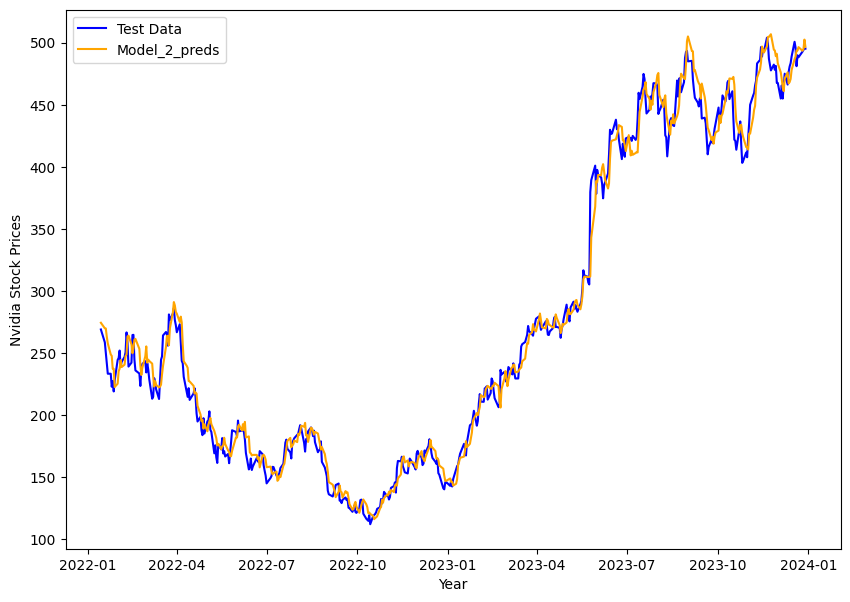

In [ ]:
plt.figure(figsize=(10,7))

plot_time_series(timesteps=X_test[-len(test_windows):], values= test_labels[:, 0],label='Test Data',format="-", color='blue')


plot_time_series(timesteps=X_test[-len(test_windows):], values= model_2_preds, format="-", label='Model_2_preds', color='Orange')

## 1D CNN

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2509, 2509)

In [ ]:
# Create train/test splits
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2007, 502, 2007, 502)

In [ ]:
train_windows[0].shape

(7,)

In [ ]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for timesteps
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # (WINDOW_SIZE, input_dim)
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[3.7405472]
 [3.6957357]
 [3.7452643]
 [3.8065848]
 [3.8584716]
 [3.714604 ]
 [3.7098875]]


In [ ]:
tf.random.set_seed(42)

# Create model
model_3 = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs, without this layer, the model will error
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_conv1D")

# Compile model
model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [ ]:
model_3.summary()

Model: "model_3_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_4 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4737 (18.50 KB)
Trainable params: 4737 (18.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Load in best performing Conv1D model and evaluate it on the test data
model_3 = tf.keras.models.load_model("model_experiments/model_3_conv1D")
model_3.evaluate(test_windows, test_labels)

16/16 [==============================] - 0s 2ms/step - loss: 7.4821


7.482089996337891

In [ ]:
# Make predictions
model_3_preds = make_preds(model_3, test_windows)
model_3_preds[:10]

16/16 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([299.08575, 296.6759 , 299.15424, 294.81128, 283.60635, 281.48273,
       275.6104 , 274.11356, 274.6109 , 278.0891 ], dtype=float32)>

In [ ]:
# Evaluate predictions
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'MAE': 7.48209,
 'MSE': 96.62964,
 'RMSE': 9.830037,
 'MAPE': 3.0098689,
 'MASE': 1.1232384}

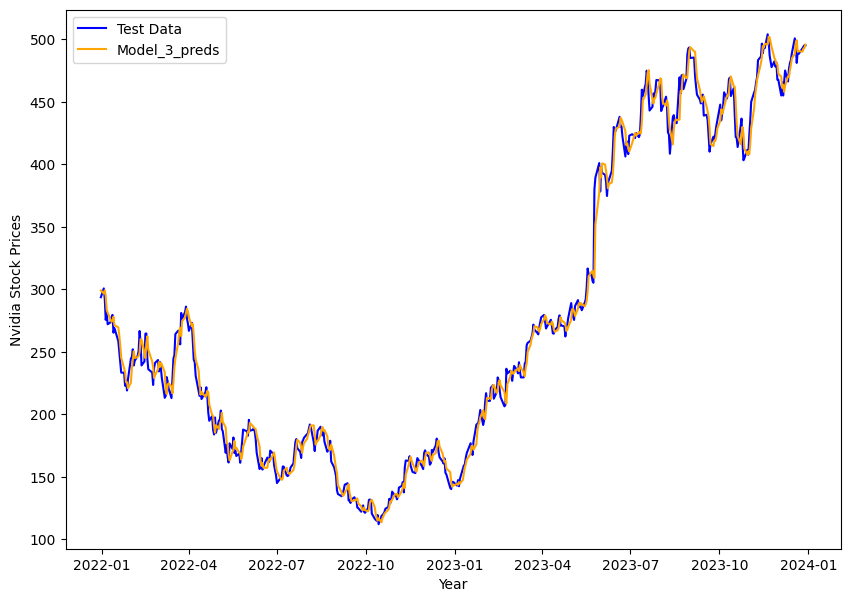

In [ ]:
plt.figure(figsize=(10,7))

plot_time_series(timesteps=X_test[-len(test_windows):], values= test_labels[:, 0],label='Test Data',format="-", color='blue')


plot_time_series(timesteps=X_test[-len(test_windows):], values= model_3_preds, format="-", label='Model_3_preds', color='Orange')

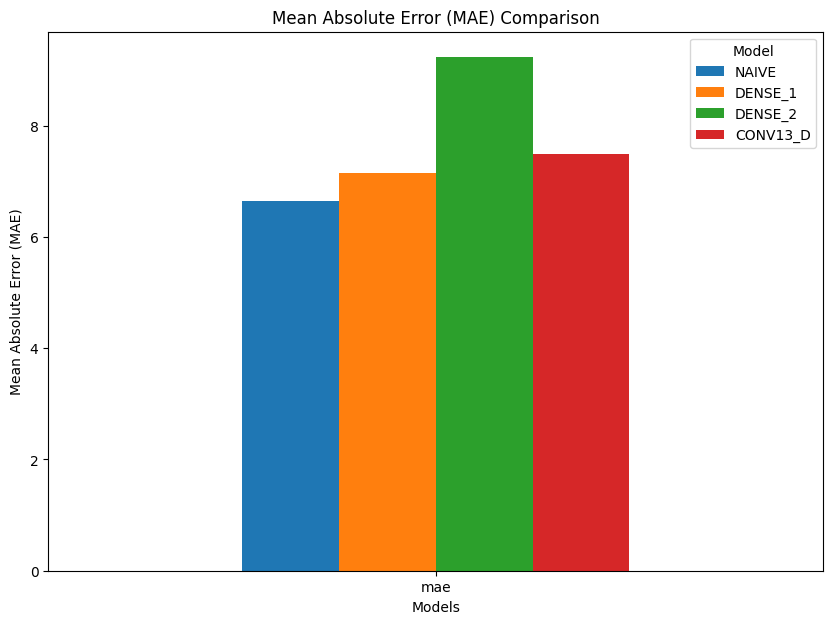

In [ ]:
df = pd.DataFrame({"NAIVE": Naive_results["MAE"],
                   "DENSE_1": model_1_results["MAE"],
                   "DENSE_2": model_2_results["MAE"],
                   "CONV13_D": model_3_results['MAE']},
                  index=["mae"])

# Plot DataFrame
ax = df.plot(figsize=(10, 7), kind="bar")
ax.set_xlabel("Models")
ax.set_ylabel("Mean Absolute Error (MAE)")
ax.set_title("Mean Absolute Error (MAE) Comparison")

# Rotate x-axis labels to be horizontal
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Add legend
ax.legend(title="Model");

## LSTM

In [ ]:
HORIZON = 1 # predict next day
WINDOW_SIZE = 7 # use previous week worth of data

In [ ]:
# Create windowed dataset
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2509, 2509)

In [ ]:
# Create train/test splits
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2007, 502, 2007, 502)

In [ ]:
# tf.random.set_seed(42)
# # Let's build an LSTM model with the Functional API
# inputs = layers.Input(shape=(WINDOW_SIZE))
# x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) # expand input dimension to be compatible with LSTM
# # print(x.shape)
# # x = layers.LSTM(128, activation="relu", return_sequences=True)(x) # this layer will error if the inputs are not the right shape
# x = layers.LSTM(128, activation="relu")(x) # using the tanh loss function results in a massive error
# # print(x.shape)
# # Add another optional dense layer (you could add more of these to see if they improve model performance)
# # x = layers.Dense(32, activation="relu")(x)
# output = layers.Dense(HORIZON)(x)
# model_LSTM = tf.keras.Model(inputs=inputs, outputs=output, name="model_LSTM_final")

# # Compile model
# model_LSTM.compile(loss="mae",
#                 optimizer=tf.keras.optimizers.Adam())

# model_LSTM.fit(train_windows,
#             train_labels,
#             epochs=100,
#             verbose=0,
#             batch_size=128,
#             validation_data=(test_windows, test_labels),
#             callbacks=[create_model_checkpoint(model_name=model_LSTM.name)])

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense
import os

# Assuming make_windows and make_train_test_splits functions are defined

# Set seed for reproducibility
tf.random.set_seed(42)

# Define input layer
inputs = Input(shape=(WINDOW_SIZE))

# Expand input dimension to be compatible with LSTM
x = tf.expand_dims(inputs, axis=1)

# LSTM layer
x = LSTM(128, activation='relu')(x)

# Output layer
outputs = Dense(HORIZON)(x)

# Define model
model_LSTM_2 = Model(inputs=inputs, outputs=outputs, name="model_LSTM_final_2")

# Compile model
model_LSTM_2.compile(loss="MAE", optimizer=tf.keras.optimizers.Adam())


# Train model with checkpoint
model_LSTM_2.fit(train_windows, train_labels, epochs=100, verbose=0,
               batch_size=128, validation_data=(test_windows, test_labels),
               callbacks=[create_model_checkpoint(model_name=model_LSTM_2.name)])



In [ ]:
# Load in best performing Conv1D model and evaluate it on the test data
model_LSTM_2 = tf.keras.models.load_model("model_experiments/model_LSTM_final_2")
model_LSTM_2.evaluate(test_windows, test_labels)

16/16 [==============================] - 0s 2ms/step - loss: 7.5788


7.578795433044434

In [ ]:
# Make predictions with our LSTM model
model_LSTM_2_preds = make_preds(model_LSTM_2, test_windows)
model_LSTM_2_preds[:10]

16/16 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([294.9605 , 290.16083, 295.46774, 289.64532, 281.4063 , 279.92203,
       275.1138 , 273.68036, 273.53864, 274.72937], dtype=float32)>

In [ ]:
# Evaluate model 5 preds
model_LSTM_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_LSTM_2_preds)
model_LSTM_2_results

{'MAE': 7.5787954,
 'MSE': 102.17172,
 'RMSE': 10.108003,
 'MAPE': 2.9724398,
 'MASE': 1.1377562}

In [ ]:
results = pd.DataFrame({"NAIVE": Naive_results["MAE"],
                   "DENSE_1": model_1_results["MAE"],
                   "DENSE_2": model_2_results["MAE"],
                   "CONV13_D": model_3_results['MAE'],
                   "LSTM": model_LSTM_2_results['MAE']},
                  index=["MAE"])

results

,NAIVE,DENSE_1,DENSE_2,CONV13_D,LSTM
MAE,6.646404,7.145024,9.224286,7.48209,7.578795


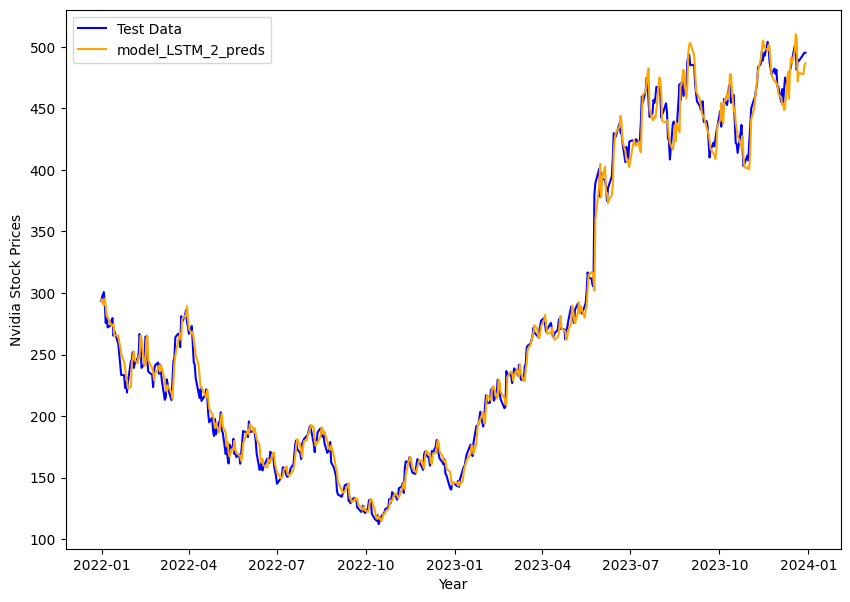

In [ ]:
plt.figure(figsize=(10,7))

plot_time_series(timesteps=X_test[-len(test_windows):], values= test_labels[:, 0],label='Test Data',format="-", color='blue')


plot_time_series(timesteps=X_test[-len(test_windows):], values= model_LSTM_2_preds, format="-", label='model_LSTM_2_preds', color='Orange')

# Model Comparison

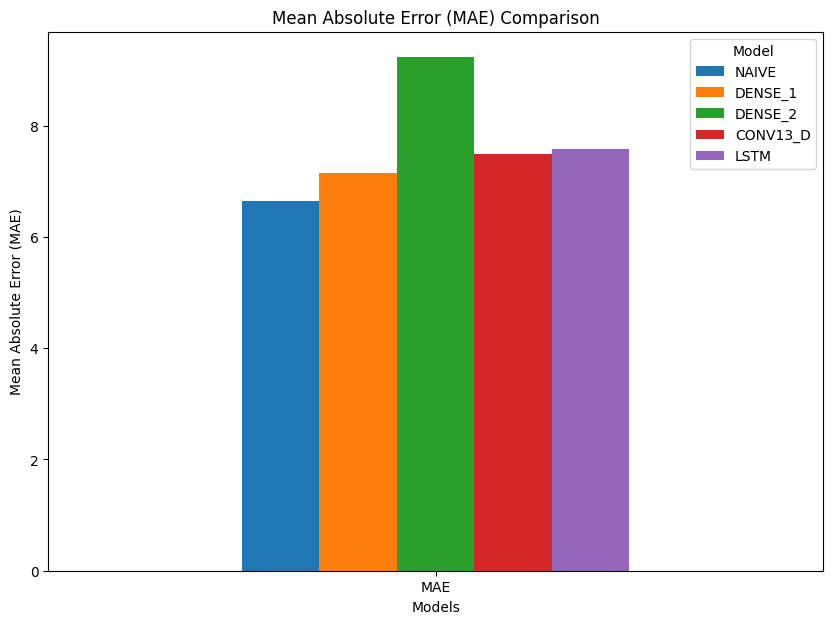

In [ ]:
df = pd.DataFrame({"NAIVE": Naive_results["MAE"],
                   "DENSE_1": model_1_results["MAE"],
                   "DENSE_2": model_2_results["MAE"],
                   "CONV13_D": model_3_results['MAE'],
                   "LSTM": model_LSTM_2_results['MAE']},
                  index=["MAE"])

# Plot DataFrame
ax = df.plot(figsize=(10, 7), kind="bar")
ax.set_xlabel("Models")
ax.set_ylabel("Mean Absolute Error (MAE)")
ax.set_title("Mean Absolute Error (MAE) Comparison")

# Rotate x-axis labels to be horizontal
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Add legend
ax.legend(title="Model");

## Reshaping

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Building and Training the RNN

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout
from keras.callbacks import EarlyStopping

# Define the early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Define your model
regressor = Sequential()

regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))

# Compile the model
regressor.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with early stopping
regressor.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])


# Adding the output layer

In [ ]:
regressor.add(Dense(units = 1))

# Compiling the RNN

In [ ]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set

In [ ]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 7s 16ms/step - loss: 0.0062
Epoch 2/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0013
Epoch 3/100
38/38 [==============================] - 1s 14ms/step - loss: 9.7205e-04
Epoch 4/100
38/38 [==============================] - 1s 15ms/step - loss: 8.6473e-04
Epoch 5/100
38/38 [==============================] - 1s 15ms/step - loss: 7.0107e-04
Epoch 6/100
38/38 [==============================] - 1s 14ms/step - loss: 7.4629e-04
Epoch 7/100
38/38 [==============================] - 1s 14ms/step - loss: 0.0010
Epoch 8/100
38/38 [==============================] - 1s 14ms/step - loss: 8.0021e-04
Epoch 9/100
38/38 [==============================] - 1s 14ms/step - loss: 8.5023e-04
Epoch 10/100
38/38 [==============================] - 1s 14ms/step - loss: 7.3994e-04
Epoch 11/100
38/38 [==============================] - 1s 14ms/step - loss: 5.8048e-04
Epoch 12/100
38/38 [==============================] - 1s 14ms/step - loss: 

# Making the predictions and visualising the results

In [ ]:
dataset_test = pd.read_csv('stock_price_test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price.

In [ ]:
dataset_total = pd.concat((data['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


In [ ]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20 non-null     float32
dtypes: float32(1)
memory usage: 208.0 bytes


# Visualizing Stock Prices

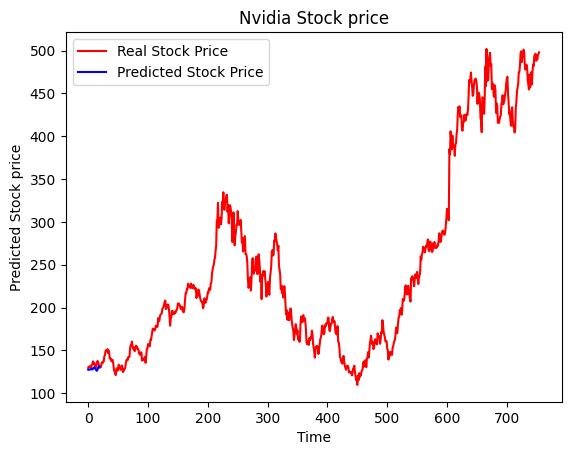

In [ ]:
plt.plot(real_stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Nvidia Stock price')
plt.xlabel('Time')
plt.ylabel('Predicted Stock price')
plt.legend()
plt.show()